In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

In [7]:
# csvs_list = glob.glob('../data/cmodels_data/*.json')
csvs_list = glob.glob('/home/mihai/git/TFG/data/segmentation-cnn/models data/*.json')
csvs_list.sort()
csvs_list

['/home/mihai/git/TFG/data/segmentation-cnn/models data/model_reduced_jac_jac_dice_sizeX2_100ep_lr1E4_batch_16_new_jac_VAR_MAYOR15_BATCH.json',
 '/home/mihai/git/TFG/data/segmentation-cnn/models data/model_reduced_jac_jac_dice_sizeX2_100ep_lr1E4_batch_16_new_jac_VAR_MAYOR30_BATCH.json',
 '/home/mihai/git/TFG/data/segmentation-cnn/models data/model_reduced_jac_jac_dice_sizeX2_100ep_lr1E4_batch_16_new_jac_VAR_MAYOR50_BATCH.json',
 '/home/mihai/git/TFG/data/segmentation-cnn/models data/model_reduced_jac_jac_dice_sizeX2_50ep_lr1E4_batch_16_new_jac_VAR_MAYOR30_BATCH.json',
 '/home/mihai/git/TFG/data/segmentation-cnn/models data/model_reduced_jac_jac_dice_sizeX2_50ep_lr5E5_batch_16_new_jac_VAR_MAYOR30_BATCH.json',
 '/home/mihai/git/TFG/data/segmentation-cnn/models data/model_reduced_jac_jac_dice_sizeX2_80ep_lr5E5_batch_16_new_jac_VAR_MAYOR30_BATCH.json']

In [13]:
history = pd.read_json(csvs_list[3]).to_dict()
EPOCHS = len(history['loss'])

In [25]:
def save_plots(model_name,history,epochs):
    path = '/home/mihai/git/TFG/data/segmentation-cnn/models plots/'
    
    os.mkdir(path + model_name)

    acc = list(history['jacard_coef'].values())[:50]
    val_acc = list(history['val_jacard_coef'].values())[:50]

    acc_dice = list(history['DiceLoss'].values())[:50]
    val_acc_dice = list(history['val_DiceLoss'].values())[:50]

    loss = list(history['loss'].values())[:50]
    val_loss = list(history['val_loss'].values())[:50]

    epochs_range = range(epochs)

    fig = plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, acc, label='Training Accuracy IoU')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy IoU')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy IoU')

    fig.savefig(path + model_name + '/accuracy.jpg')

    fig2 = plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    # plt.show()

    fig2.savefig(path + model_name + '/loss.jpg')

    fig3 = plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, acc_dice, label='Training Dice Acc')
    plt.plot(epochs_range, val_acc_dice, label='Validation Dice Acc')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy Dice')
    # plt.show()

    fig3.savefig(path + model_name + '/dice.jpg')

In [ ]:
for item in csvs_list:
    history = pd.read_json(item).to_dict()
    model_name = item.split('/')[1].split('.')[0]
    save_plots(model_name,history,len(history['loss']))

In [16]:
len(history['jacard_coef'].values())

100

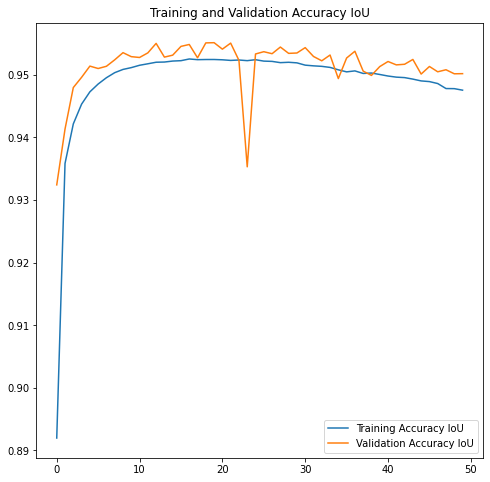

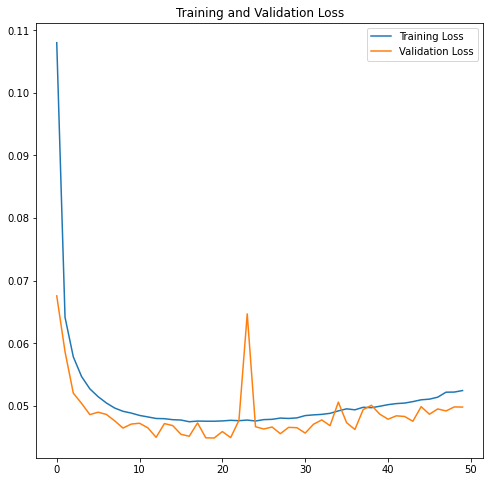

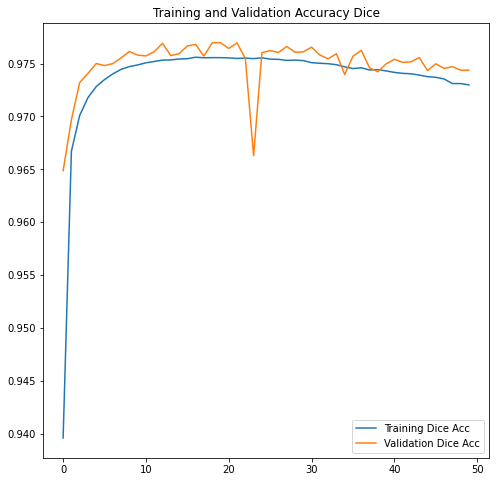

In [26]:
save_plots(model_name,history,50)

In [33]:
history = pd.read_json(csvs_list[0]).to_dict()
model_name = csvs_list[2].split('/')[-1].split('.')[0] + '_CROP'

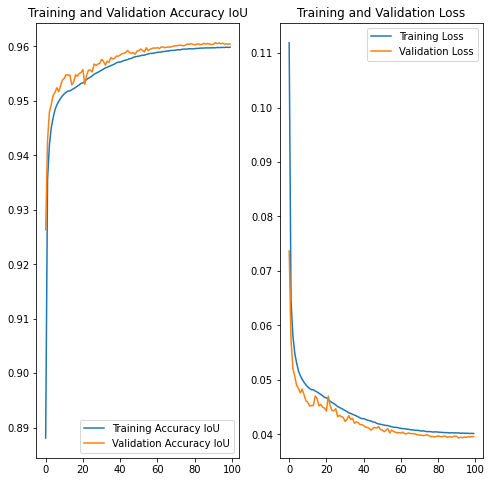

In [34]:
acc = list(history['jacard_coef'].values())
val_acc = list(history['val_jacard_coef'].values())

acc_dice = list(history['DiceLoss'].values())
val_acc_dice = list(history['val_DiceLoss'].values())

loss = list(history['loss'].values())
val_loss = list(history['val_loss'].values())

epochs_range = range(100)

fig = plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy IoU')
plt.plot(epochs_range, val_acc, label='Validation Accuracy IoU')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy IoU')

# fig.savefig(path + model_name + '/accuracy.jpg')

# fig2 = plt.figure(figsize=(8, 8))
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Learning Rate')

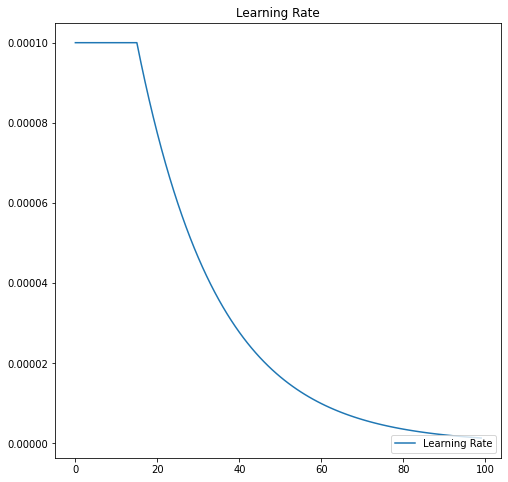

In [35]:
# lrArr = []
# lr =1E-4
# for i in range(50):
#     if i > 16:
#         lr = lr * 0.85
#         lrArr.append(lr)
#     else:
#         lrArr.append(lr)
lrArr = list(history['lr'].values())

epochs_range = range(0,100)
fig = plt.figure(figsize=(8, 8))
plt.plot(epochs_range, lrArr, label='Learning Rate')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy IoU')
plt.legend(loc='lower right')
plt.title('Learning Rate')



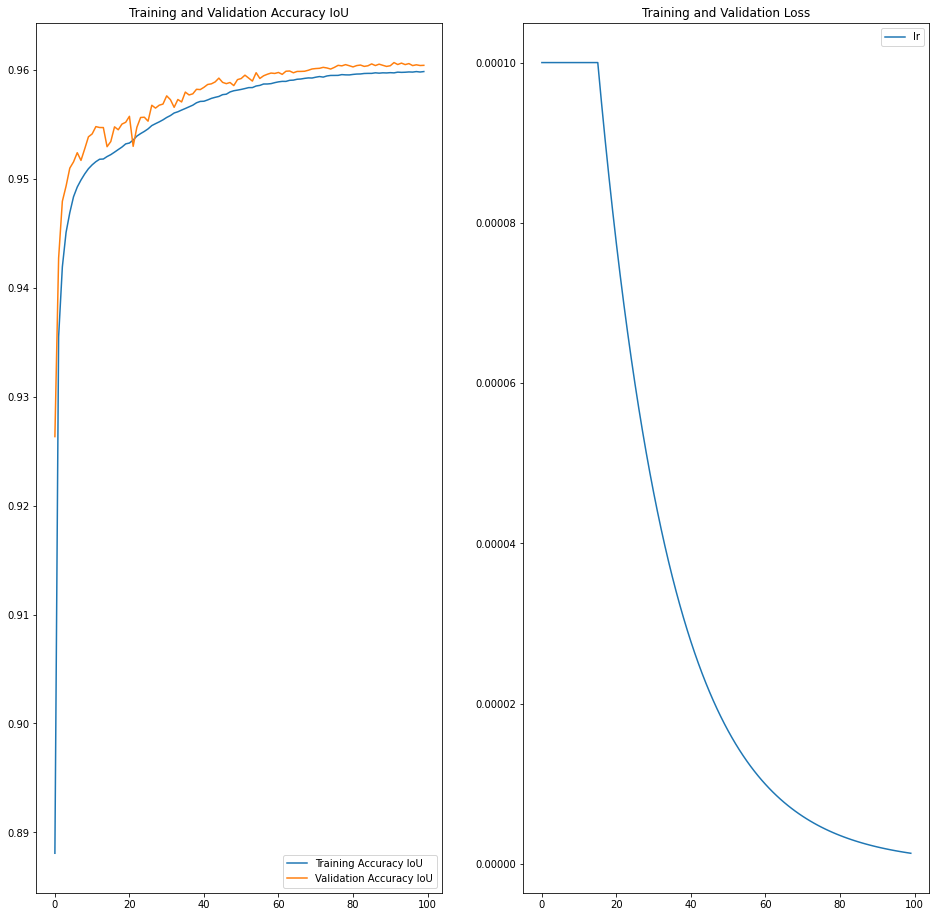

In [14]:
acc = list(history['jacard_coef'].values())
val_acc = list(history['val_jacard_coef'].values())

acc_dice = list(history['DiceLoss'].values())
val_acc_dice = list(history['val_DiceLoss'].values())

loss = list(history['loss'].values())
val_loss = list(history['val_loss'].values())

epochs_range = range(EPOCHS)

fig = plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy IoU')
plt.plot(epochs_range, val_acc, label='Validation Accuracy IoU')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy IoU')

plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.plot(epochs_range,list(history['lr'].values()),label='lr')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
